# N-charge system

- The electric field for a single charge is given by:
\\( E = q * \frac{\hat{r}}{r} \\) 
- The electric Potential: \\( V  = q * \frac{1}{r} \\).
- In cartesian coordinate: \\( \frac{1}{r}  = \frac{1}{\sqrt{((x-x^{'})^{2} + (y - y^{'})^{2})}} \\).

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set()

#### Class Charge
Lets create a class ```Charge``` with function ```line``` to calculate the distance between source and field point and function ```V_point_charge``` to calculate the electric potential ata  fileld point ```x,y``` due to source poin at ```pos```.

In [10]:
class Charge:
    
    '''Data incapsulation'''
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos
        
        
    def line(self, x,y):
        '''create a vector from charge to observation point'''
        self.vector = [x-self.pos[0],y-self.pos[1]]
        '''norm of the vector'''
        self.norm = np.sqrt((self.vector[0])**2+(self.vector[1])**2)
        
    
    def V_point_charge(self, x, y):
        '''recall length'''
        self.line(x,y)
        '''Make sure to exclude source itself'''
        if self.norm > 0:
            self.V = self.q/self.norm
            
            '''if length is zero, set V equal to 0'''
        elif self.norm == 0:
            self.V = 0
            
        return self.V

#### Example :  

Lets use charge ```q = 100``` at posiotion ```x =1``` and ```y =1``` to find electric potential at different points in 2D

In [11]:
C = Charge(100, [1,1])

In [12]:
for x in range(3):
    for y in range(3):
        print(x,y, "|", C.V_point_charge(x, y))

0 0 | 70.71067811865474
0 1 | 100.0
0 2 | 70.71067811865474
1 0 | 100.0
1 1 | 0
1 2 | 100.0
2 0 | 70.71067811865474
2 1 | 100.0
2 2 | 70.71067811865474


#### Total Electric potential
Total electric potential at a point ```x,y``` is the sum of contribution of all charges defined in class ```Charge```.

In [13]:
def V_total(x, y, charges):
    V = 0
    for C in charges:
        Vp = C.V_point_charge(x, y)
        V  = V+Vp
    return V

- Example: Lets use collection of charges to find a electric potential at point x = 4, y =4

In [14]:
sample_charges = [Charge(q = 20, pos = [23,34]),
                  Charge(q = 25, pos = [13,48]),
                  Charge(q = 40, pos = [3,14]),
                  Charge(q = 80, pos = [88,60])]


V_total(x=4, y=4, charges = sample_charges)

5.892446541150622

####  Lattice of charges (```scatter```)
Now, we are going to implement ```Charge``` class to define charge distribution and calculate electric potential at several places.

 - To create a lattice of charges.

In [15]:
'''first charge to be at x=1,y=1'''
q = 100

'''Dictionary to collect charges, x and y xoordinates'''
Qd = []

'''List to collect Charge objects'''
charges = []


'''use for loops to construct collection of charges objects'''
for i in range(5):
    for j in range(5):
        
        '''Collecting charges and their coordinates'''
        Qd.append({"q": q, "x": i*20, "y":j*20})
        
        
        '''charge objects are being collected'''
        charges.append(Charge(q , [20*i, 20*j]))
        
        '''change the sign of charge alternatly'''
        q = -q
  

- To visualize lattice of charges

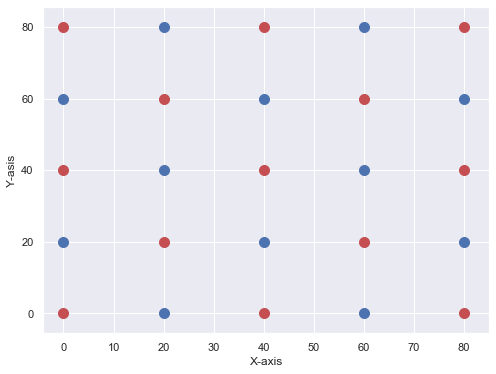

In [16]:
'''Plot the lattice of charges'''

plt.figure(figsize = [8,6])

for item in Qd:
    
    '''Sctaeer as red dot if charge is positive'''
    if item['q']> 0:
        plt.scatter(item['x'], item['y'], c = 'r',s =100)
        
        
        '''Scatter as blue dot if charge is negative'''
    else:
        plt.scatter(item['x'], item['y'], c = 'b',s =100)
        
plt.xlabel("X-axis")  
plt.ylabel("Y-asis")
plt.show()

#### Electric Potential (```heatmap```)

- To find Electric Potential at several points due to lattice of charges

In [17]:
'''Create X and Y coordinate'''
X = np.arange(-10,110,2)
Y = np.arange(-10,110,2)

'''Initiate vacant V-list of list'''
V = [[0.0 for i in range(len(X))] for j in range(len(Y))]

'''Calculate Electric potential at each x,y coordinate'''
for i,x in enumerate(X):
    for j,y in enumerate(Y):
        v = V_total(x, y, charges)
        V[i][j] = v       

In [18]:
VV = np.array(V)

- To plot Electric potential 

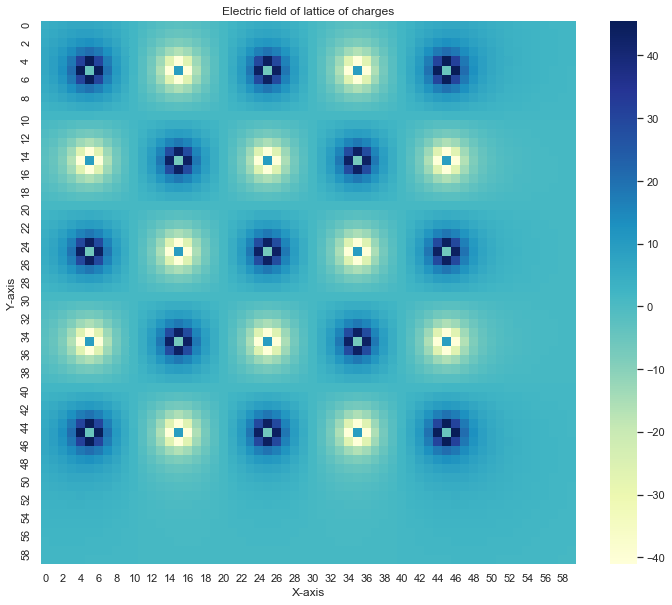

In [19]:
plt.figure(figsize = [12,10])
sns.heatmap(VV,annot=False,cmap='YlGnBu')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Electric field of lattice of charges")
plt.show()

#### Electric Field (```meshgrid```)

In [2]:
from matplotlib.patches import Circle

- To calculate Electric Field at at point ```x,y``` due to charge ```q``` at ```r0```

In [3]:
def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

- To define the number charge in the system

In [4]:
nq = 2**int(2)

- To create the ```meshgrid``` to make a plot

In [5]:
# Grid of x, y points
nx, ny = 16, 16
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

- To define charge touples ```(q,x0,y0)```

In [6]:
charges = []
for i in range(nq):
    q = i%2 * 2 - 1
    charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

- To calculate Electric Field at point ```x,y``` due to predefined charge distribution

In [7]:
# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

- To plot Vector Field for Electric Field using ```streamplot```.

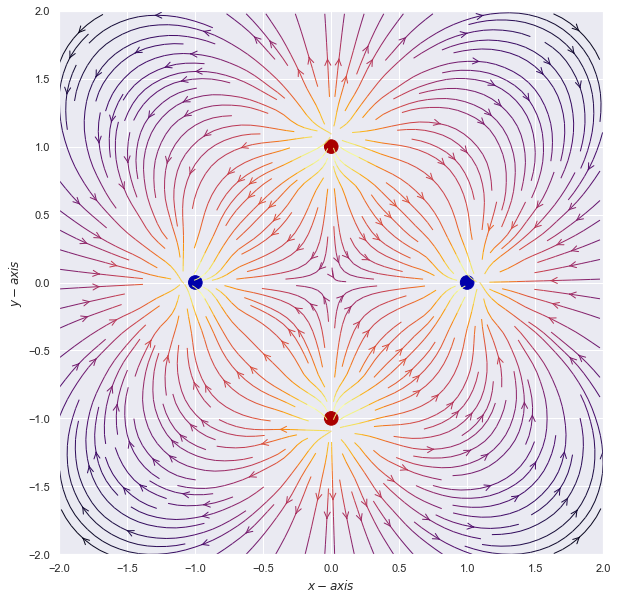

In [8]:
fig = plt.figure(figsize = [12,10])
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

ax.set_xlabel('$x-axis$')
ax.set_ylabel('$y-axis$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()

#### Vector Field (```quiver```)

 - To create a meshgrid for plot

In [ ]:
x,y = np.meshgrid(np.linspace(-10,10,20),np.linspace(-10,10,20))

- To set up parametric variables for vector field

In [ ]:
u = -y/np.sqrt(x**2 + y**2)
v = x/np.sqrt(x**2 + y**2)

- To visualize vector field

In [ ]:
plt.figure(figsize = [12,10])
plt.quiver(x,y,u,v)
plt.show()

#### Vector Field (```quiver``` and ```quiverkey```)

- To  set number of points and create space of ```x,y``` for vector field

In [75]:
N = 25
x = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/N)
y = np.arange(0,2*np.pi+2*np.pi/20,2*np.pi/N)

- To create ```meshgrid``` for plot

In [76]:
X,Y = np.meshgrid(x,y)

- To create parametric variables for vector field

In [77]:
U = np.sin(X)*np.cos(Y)
V = -np.cos(X)*np.sin(Y)

- To create Plot

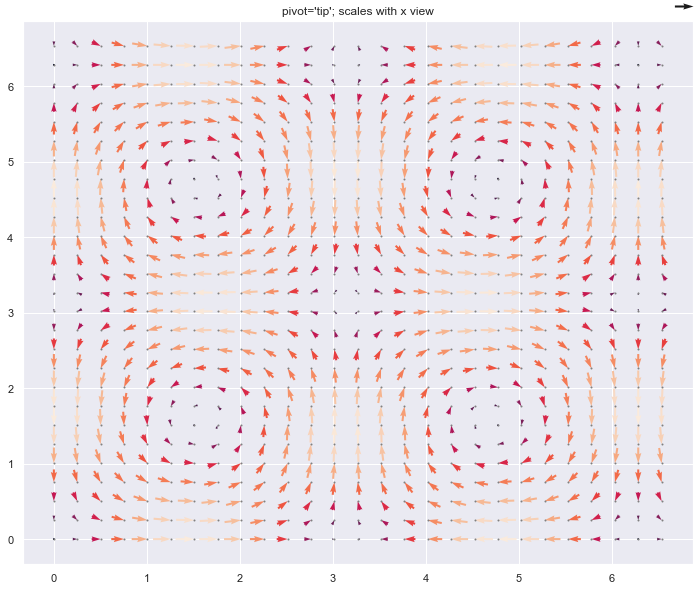

In [78]:
fig3, ax3 = plt.subplots(figsize = [12,10])
ax3.set_title("pivot='tip'; scales with x view")

M = np.hypot(U, V)
Q = ax3.quiver(X, Y, U, V, M,\
               units='x',\
               pivot='tip',
               width=0.022,
               scale=1/0.20)

qk = ax3.quiverkey(Q, 0.9, 0.9, 1,\
                   r'$1 \frac{m}{s}$',\
                   labelpos='E',
                   coordinates='figure')

ax3.scatter(X, Y, color='0.5', s=1)
plt.show()